In [61]:
import pandas as pd
from ast import literal_eval
# from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
movies_metadata = pd.read_csv('./data/movies_metadata.csv')
links_small = pd.read_csv('./data/links_small.csv')
movies_keywords = pd.read_csv('./data/keywords.csv')

C:\Users\C402\AppData\Local\Temp\ipykernel_23264\1459081923.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('./data/movies_metadata.csv')


In [134]:
# links_small1 = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
links_small = links_small['tmdbId'].dropna().astype(int)


In [64]:
links_small.info()

<class 'pandas.core.series.Series'>
Index: 9112 entries, 0 to 9124
Series name: tmdbId
Non-Null Count  Dtype
--------------  -----
9112 non-null   int64
dtypes: int64(1)
memory usage: 142.4 KB


In [65]:

# movies_metadata1 = movies_metadata[movies_metadata['id'].isin(links_small.astype('str'))]
# links_small이 이미 정수형이라면 한 번만 변환
target_ids = links_small.astype(str)
movies_metadata = movies_metadata[movies_metadata['id'].isin(target_ids)]
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9099 entries, 0 to 45265
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  9099 non-null   object 
 1   belongs_to_collection  1674 non-null   object 
 2   budget                 9099 non-null   object 
 3   genres                 9099 non-null   object 
 4   homepage               1974 non-null   object 
 5   id                     9099 non-null   object 
 6   imdb_id                9099 non-null   object 
 7   original_language      9099 non-null   object 
 8   original_title         9099 non-null   object 
 9   overview               9087 non-null   object 
 10  popularity             9099 non-null   object 
 11  poster_path            9096 non-null   object 
 12  production_companies   9099 non-null   object 
 13  production_countries   9099 non-null   object 
 14  release_date           9099 non-null   object 
 15  revenue 

In [66]:
movies = movies_metadata[['id', 'title', 'genres', 'popularity', 'release_date']]

In [67]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9099 entries, 0 to 45265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            9099 non-null   object
 1   title         9099 non-null   object
 2   genres        9099 non-null   object
 3   popularity    9099 non-null   object
 4   release_date  9099 non-null   object
dtypes: object(5)
memory usage: 426.5+ KB


In [68]:
# movies['id']
movies_keywords['id'] = movies_keywords['id'].astype('str')

In [69]:
movies = movies.merge(movies_keywords,on='id')

In [70]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9151 entries, 0 to 9150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            9151 non-null   object
 1   title         9151 non-null   object
 2   genres        9151 non-null   object
 3   popularity    9151 non-null   object
 4   release_date  9151 non-null   object
 5   keywords      9151 non-null   object
dtypes: object(6)
memory usage: 429.1+ KB


In [71]:
movies_genres = movies['genres'].apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies_genres = movies_genres.apply(lambda x: sorted(x))
movies['genres'] = movies_genres

In [72]:
movies_k = movies['keywords'].apply(literal_eval).apply(lambda x: [sorted(i['name'] for i in x)] if isinstance(x, list) else [])
movies['keywords'] = movies_k
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9151 entries, 0 to 9150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            9151 non-null   object
 1   title         9151 non-null   object
 2   genres        9151 non-null   object
 3   popularity    9151 non-null   object
 4   release_date  9151 non-null   object
 5   keywords      9151 non-null   object
dtypes: object(6)
memory usage: 429.1+ KB


In [73]:
movies_k = movies_keywords['keywords'].apply(literal_eval).apply(lambda x: sorted(i['name'] for i in x) if isinstance(x, list) else [])
movies['keywords'] = movies_k
movies_k

0        [boy, boy next door, friends, friendship, jeal...
1        [based on children's book, board game, disappe...
2        [best friend, duringcreditsstinger, fishing, o...
3        [based on novel, chick flick, divorce, interra...
4        [aging, baby, confidence, contraception, daugh...
                               ...                        
46414                                        [tragic love]
46415                                [artist, pinoy, play]
46416                                                   []
46417                                                   []
46418                                                   []
Name: keywords, Length: 46419, dtype: object

In [74]:
movies_keywords['keywords'].apply(literal_eval).apply(lambda x: [sorted(i['name'] for i in x)] if isinstance(x, list) else []).head()

0    [[boy, boy next door, friends, friendship, jea...
1    [[based on children's book, board game, disapp...
2    [[best friend, duringcreditsstinger, fishing, ...
3    [[based on novel, chick flick, divorce, interr...
4    [[aging, baby, confidence, contraception, daug...
Name: keywords, dtype: object

In [126]:
movies['str_genres_keyword'] = movies['genres'] + movies['keywords']
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  9146 non-null   object        
 1   title               9146 non-null   object        
 2   genres              9146 non-null   object        
 3   popularity          9146 non-null   float64       
 4   release_date        9146 non-null   datetime64[ns]
 5   keywords            9146 non-null   object        
 6   str_genres_keyword  9146 non-null   object        
 7   year                9146 non-null   int32         
 8   log_popularity      9146 non-null   float64       
 9   popularity_log      9146 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 678.9+ KB


In [76]:
movies['str_genres_keyword'] = movies['str_genres_keyword'] \
    .apply(lambda x: sorted(x)) \
    .apply(lambda x: ' '.join(x) if len(x) > 0 else None)

In [77]:
movies.iloc[0]['str_genres_keyword']

'Animation Comedy Family boy boy next door friends friendship jealousy new toy rivalry toy toy comes to life'

In [78]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [79]:
movies['year'] = movies['release_date'].dt.year

In [80]:
movies['keywords'].head()

0    [boy, boy next door, friends, friendship, jeal...
1    [based on children's book, board game, disappe...
2    [best friend, duringcreditsstinger, fishing, o...
3    [based on novel, chick flick, divorce, interra...
4    [aging, baby, confidence, contraception, daugh...
Name: keywords, dtype: object

In [127]:
movies['popularity'] = movies['popularity'].astype('float')
movies['popularity'].describe()

count    9146.000000
mean        7.263028
std         9.354797
min         0.000004
25%         2.940102
50%         6.416895
75%         9.858254
max       547.488298
Name: popularity, dtype: float64

<Axes: xlabel='popularity', ylabel='Count'>

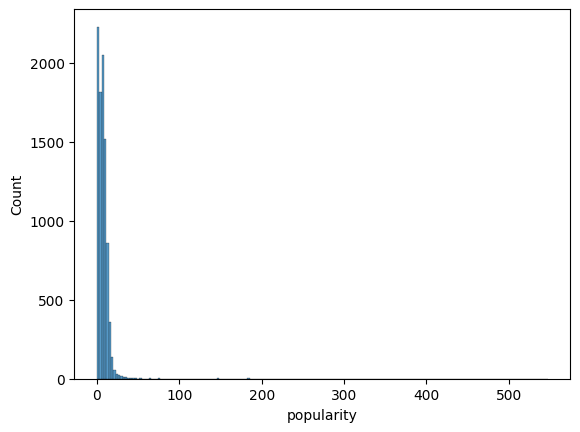

In [109]:
import seaborn as sns

sns.histplot(movies['popularity'])


In [128]:
import numpy as np
movies['popularity_log'] = np.log( movies['popularity'])
movies[ ['popularity','popularity_log']].describe()

,popularity,popularity_log
count,9146.000000,9146.000000
mean,7.263028,1.560873
std,9.354797,1.157222
min,0.000004,-12.429216
25%,2.940102,1.078444
50%,6.416895,1.858934
75%,9.858254,2.288309
max,547.488298,6.305341


<Axes: xlabel='popularity_log', ylabel='Count'>

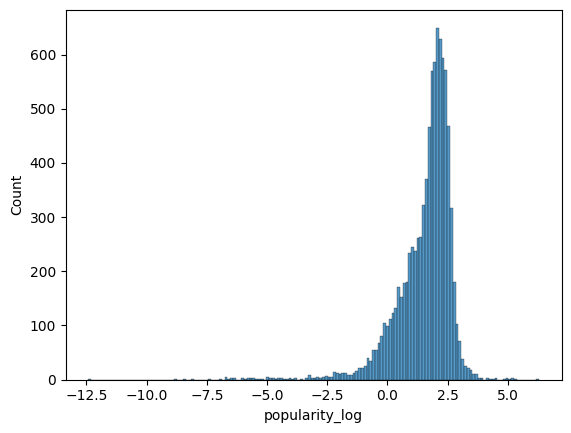

In [122]:
sns.histplot(movies['popularity_log'])

In [130]:
#  movies.isnull().sum()
movies = movies.dropna().reset_index(drop=True)

In [131]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  9146 non-null   object        
 1   title               9146 non-null   object        
 2   genres              9146 non-null   object        
 3   popularity          9146 non-null   float64       
 4   release_date        9146 non-null   datetime64[ns]
 5   keywords            9146 non-null   object        
 6   str_genres_keyword  9146 non-null   object        
 7   year                9146 non-null   int32         
 8   log_popularity      9146 non-null   float64       
 9   popularity_log      9146 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 678.9+ KB


In [87]:
(movies['str_genres_keyword'].str.strip().str.len() == 0).sum()

np.int64(0)

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_mat = tfidf_vectorizer.fit_transform(movies['str_genres_keyword'])
tfidf_mat.shape

(9146, 8220)

In [118]:
arr_tfidf = tfidf_mat.toarray()
arr_tfidf.shape # 샘데이터 값(9124, 9008), 난 (9146, 8220)

(9146, 8220)

In [90]:
arr_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9146, 8220))

### Euclidean Distance(유클리드 거리)

In [91]:
from sklearn.metrics.pairwise import euclidean_distances


In [92]:
similarity_of_euclidean = euclidean_distances(arr_tfidf, arr_tfidf)

In [93]:
similarity_of_euclidean.shape

(9146, 9146)

In [99]:
sorted_similarity_of_euclidean = np.argsort(similarity_of_euclidean, axis=1) 

In [100]:
sorted_similarity_of_euclidean[0]

array([   0, 1809, 7555, ...,   29,   27,    5], shape=(9146,))

In [96]:
movies[['title','str_genres_keyword']].iloc[ [0,1809] ]

,title,str_genres_keyword
0,Toy Story,Animation Comedy Family boy boy next door frie...
1809,The Thing,Horror Mystery Science Fiction defense industr...


In [ ]:
def reacomm_of_euclidean(movie_name, top_n=5):
    movie_of_title = movies[movies['title'] == movie_name]
    movie_index = movie_of_title.index.values[0]
    print(movie_index)
    similarity_indexes = sorted_similarity_of_euclidean[movie_index, 1:top_n * 2]
    similarity_indexes = similarity_indexes.reshape(-1) # 한줄로 바꿈
    print(similarity_indexes)
    return movies.iloc[similarity_indexes].sort_values(['popularity_log', 'year'], ascending=False)[:top_n]

recomm_movies = reacomm_of_euclidean('Robin Hood')
print(recomm_movies[['title','popularity_log','year']])

2435
[1274 7541 1042 1885 5410 2037 1884 6699 5175]
                                   title  log_popularity  year
1042  Indiana Jones and the Last Crusade        2.693883  1989
1885                    A View to a Kill        2.552627  1985
1274                               Mimic        2.211446  1997
6699                           Hairspray        2.050019  2007
7541                  Sex and the City 2        1.981827  2010
